*22 July 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 4
Task:
- Compute the unigram, bigram, and trigram probabilities with smoothing, using as little help from NLP toolkits as possible.
- Compare your results with the same statistics obtained from NLTK.
- Do this for two datasets: one English, and one Indic.
- Tokenize and preprocess text appropriately if required.
- Show the top 20 unigram, bigram, and trigram probabilities.

# Text processing, brown and indic - malayalam corpus

In [1]:
!git clone https://gitlab.com/smc/corpus.git

Cloning into 'corpus'...
remote: Enumerating objects: 8843, done.
remote: Counting objects: 100% (8506/8506), done.
remote: Compressing objects: 100% (7508/7508), done.
remote: Total 8843 (delta 889), reused 8476 (delta 873), pack-reused 337 (from 1)
Receiving objects: 100% (8843/8843), 285.69 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (1106/1106), done.
Updating files: 100% (10173/10173), done.


In [2]:
with open('/content/corpus/text/deshabhimani/news.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.4 MB/s eta 0:00:00


In [4]:
from indicnlp.tokenize import indic_tokenize

In [5]:
words= indic_tokenize.trivial_tokenize(text,lang='ma')

In [6]:
import string

In [7]:
import re

In [8]:
malayalam_punctuation = string.punctuation + '।‘’“”…'
words_clean = [re.sub(f'[{malayalam_punctuation}]', '', word) for word in words]
words_clean = [word for word in words_clean if word]
print(words_clean)

In [9]:
words = words_clean

In [ ]:
import nltk
nltk.download('brown')
nltk.download('punkt')

In [ ]:
from nltk.corpus import brown

In [ ]:
brown_text = ' '.join(brown.words())
brown_text_clean = re.sub(f'[{string.punctuation}]', '', brown_text)
tokens = nltk.word_tokenize(brown_text_clean)

In [ ]:
from collections import Counter

def unigram_probabilities(tokens):
    total_count = len(tokens)
    unigram_counts = Counter(tokens)
    vocabulary_size = len(unigram_counts)
    unigram_probs = {word: (count + 1) / (total_count + vocabulary_size) for word, count in unigram_counts.items()}
    return unigram_probs


In [ ]:
def ngram_probabilities(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    ngram_counts = Counter(ngrams)
    n_minus_1_gram_counts = Counter(zip(*[tokens[i:] for i in range(n-1)]))
    vocabulary_size = len(set(tokens))

    ngram_probs = {}
    for ngram, count in ngram_counts.items():
        n_minus_1_gram = ngram[:-1]
        ngram_probs[ngram] = (count + 1) / (n_minus_1_gram_counts[n_minus_1_gram] + vocabulary_size)

    return ngram_probs

In [ ]:
import matplotlib.pyplot as plt

def plot_unigram_distribution(unigram_probs):
    top_20_unigrams = sorted(unigram_probs.items(), key=lambda item: item[1], reverse=True)[:20]
    words, probs = zip(*top_20_unigrams)
    plt.figure(figsize=(10, 6))
    plt.bar(words, probs, color='blue')
    plt.xticks(rotation=90)
    plt.title('Top 20 Unigram Probabilities')
    plt.xlabel('Unigrams')
    plt.ylabel('Probability')
    plt.show()

In [ ]:
def plot_ngram_distribution(ngram_probs, title):
    top_20_ngrams = sorted(ngram_probs.items(), key=lambda item: item[1], reverse=True)[:20]
    ngrams, probs = zip(*top_20_ngrams)
    ngrams = [' '.join(ngram) for ngram in ngrams]
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, probs, color='green')
    plt.xticks(rotation=90)
    plt.title(f'Top 20 {title}')
    plt.xlabel('N-grams')
    plt.ylabel('Probability')
    plt.show()

In [ ]:
!sudo apt-get install fonts-noto

In [ ]:
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='/usr/share/fonts/truetype/noto/NotoSansMalayalam-Regular.ttf')

In [ ]:
def plot_unigram_distribution_ma(unigram_probs):
    top_20_unigrams = sorted(unigram_probs.items(), key=lambda item: item[1], reverse=True)[:20]
    words, probs = zip(*top_20_unigrams)
    plt.figure(figsize=(10, 6))
    plt.bar(words, probs, color='blue')
    plt.xticks(rotation=90)
    plt.xticks(fontproperties=font)
    plt.title('Top 20 Unigram Probabilities')
    plt.xlabel('Unigrams')
    plt.ylabel('Probability')
    plt.show()

In [ ]:
def plot_ngram_distribution_ma(ngram_probs, title):
    top_20_ngrams = sorted(ngram_probs.items(), key=lambda item: item[1], reverse=True)[:20]
    ngrams, probs = zip(*top_20_ngrams)
    ngrams = [' '.join(ngram) for ngram in ngrams]
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, probs, color='green')
    plt.xticks(rotation=90)
    plt.xticks(fontproperties=font)
    plt.title(f'Top 20 {title}')
    plt.xlabel('N-grams')
    plt.ylabel('Probability')
    plt.show()

# Brown Corpus

In [21]:
unigram_probs = unigram_probabilities(tokens)
bigram_probs = ngram_probabilities(tokens, 2)
trigram_probs = ngram_probabilities(tokens, 3)

In [22]:
def top_n_probabilities(ngram_probs, n=20):
    sorted_probs = sorted(ngram_probs.items(), key=lambda item: item[1], reverse=True)
    return sorted_probs[:n]

top_20_unigrams = top_n_probabilities(unigram_probs)
top_20_bigrams = top_n_probabilities(bigram_probs)
top_20_trigrams = top_n_probabilities(trigram_probs)

print("Top 20 Unigrams:", top_20_unigrams)
print("Top 20 Bigrams:", top_20_bigrams)
print("Top 20 Trigrams:", top_20_trigrams)

Top 20 Unigrams: [('the', 0.05872531769672101), ('of', 0.03378620703216811), ('and', 0.026140510393559073), ('to', 0.024096351696426984), ('a', 0.02049308890826194), ('in', 0.018298169995720658), ('that', 0.00958685146185907), ('is', 0.009375225320974116), ('was', 0.009156107989261378), ('for', 0.008279638662410422), ('The', 0.006797319277362277), ('with', 0.006566965159407859), ('it', 0.006296345890754091), ('as', 0.0062804271102450465), ('he', 0.006149331270758792), ('his', 0.006055691385411468), ('on', 0.005989207066814868), ('be', 0.005941450725287732), ('I', 0.004848673263284456), ('by', 0.004779379748127436)]
Top 20 Bigrams: [(('of', 'the'), 0.10663200398252115), (('in', 'the'), 0.07518786811996479), (('to', 'the'), 0.04294976701188052), (('on', 'the'), 0.03795091418217757), (('for', 'the'), 0.027899170308442585), (('and', 'the'), 0.026048887267420648), (('at', 'the'), 0.025473194102365128), (('with', 'the'), 0.024132926769612078), (('from', 'the'), 0.02313659820238543), (('by', 

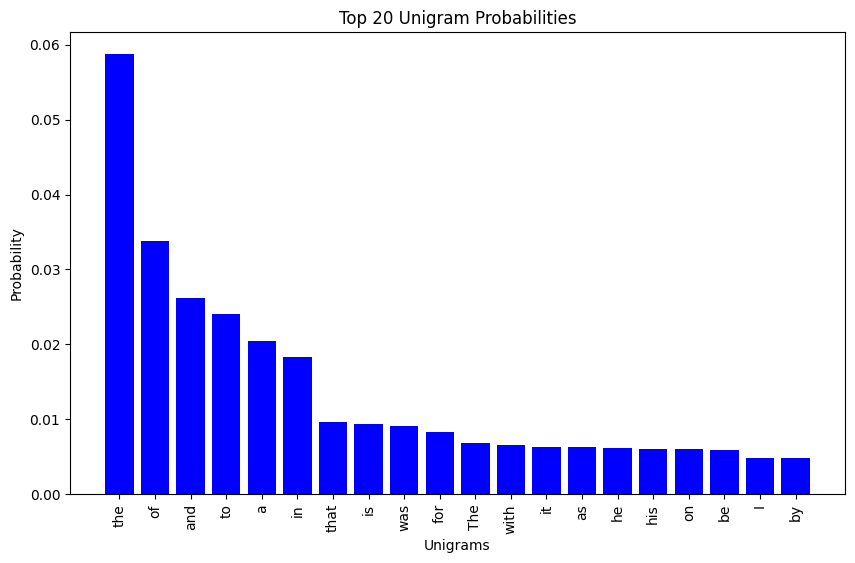

In [23]:
plot_unigram_distribution(unigram_probs)

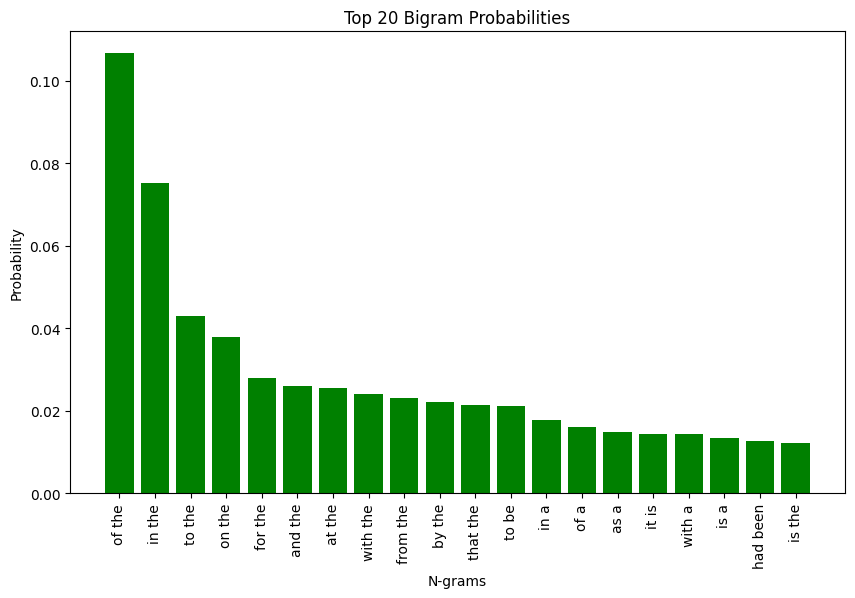

In [24]:
plot_ngram_distribution(bigram_probs, 'Bigram Probabilities')

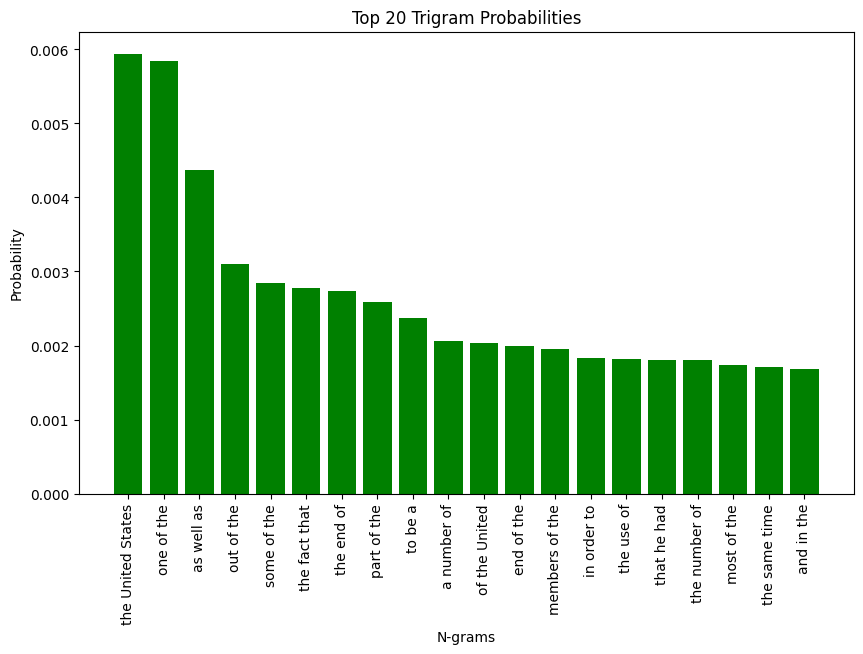

In [25]:
plot_ngram_distribution(trigram_probs, 'Trigram Probabilities')

# Indic - Malayalam

In [26]:
unigram_probs_ma = unigram_probabilities(words)
bigram_probs_ma = ngram_probabilities(words, 2)
trigram_probs_ma = ngram_probabilities(words, 3)

In [27]:
top_20_unigrams = top_n_probabilities(unigram_probs_ma)
top_20_bigrams = top_n_probabilities(bigram_probs_ma)
top_20_trigrams = top_n_probabilities(trigram_probs_ma)
print("Top 20 Unigrams:", top_20_unigrams)
print("Top 20 Bigrams:", top_20_bigrams)
print("Top 20 Trigrams:", top_20_trigrams)

Top 20 Unigrams: [('കെ', 0.0041238160627500514), ('ഒരു', 0.00344171481558993), ('ഈ', 0.0032858758942889933), ('എം', 0.003094952817930777), ('പറഞ്ഞു', 0.002802040918731634), ('പി', 0.0026772065995743395), ('എന്ന', 0.002289853050424498), ('വി', 0.0019683842808298955), ('സർക്കാർ', 0.0018513011122085108), ('സംസ്ഥാന', 0.0016995417438212112), ('സെക്രട്ടറി', 0.0016263137690214254), ('എ', 0.001565324452962551), ('ജില്ലാ', 0.0014480373066954847), ('എസ്', 0.0013597149861152417), ('സി', 0.0013568592990756956), ('കോടി', 0.0012954620277254576), ('എന്നിവർ', 0.0012181545000120348), ('മന്ത്രി', 0.0012128510812243064), ('എന്നാൽ', 0.0011779709038127093), ('the', 0.001140439017007248)]
Top 20 Bigrams: [(('സിപിഐ', 'എം'), 0.00583414574701438), (('എന്നിവർ', 'സംസാരിച്ചു'), 0.003202880005355885), (('കോടി', 'രൂപ'), 0.002977493917274939), (('ജനറൽ', 'സെക്രട്ടറി'), 0.002227804466610437), (('മുഖ്യമന്ത്രി', 'പിണറായി'), 0.002049455513233714), (('അദ്ദേഹം', 'പറഞ്ഞു'), 0.001808334793305962), (('പി', 'കെ'), 0.0017565407

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 116 (t) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 104 (h) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 101 (e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


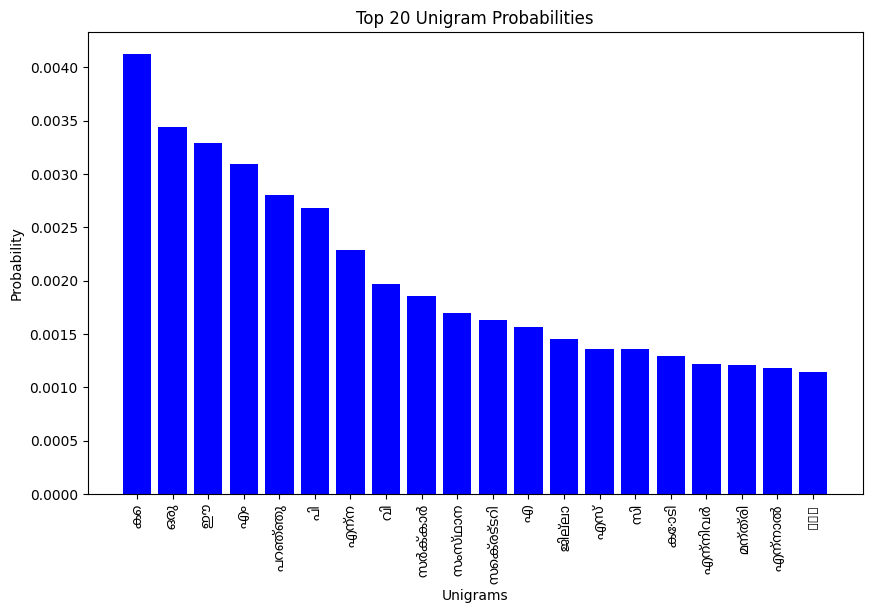

In [28]:
plot_unigram_distribution_ma(unigram_probs_ma)

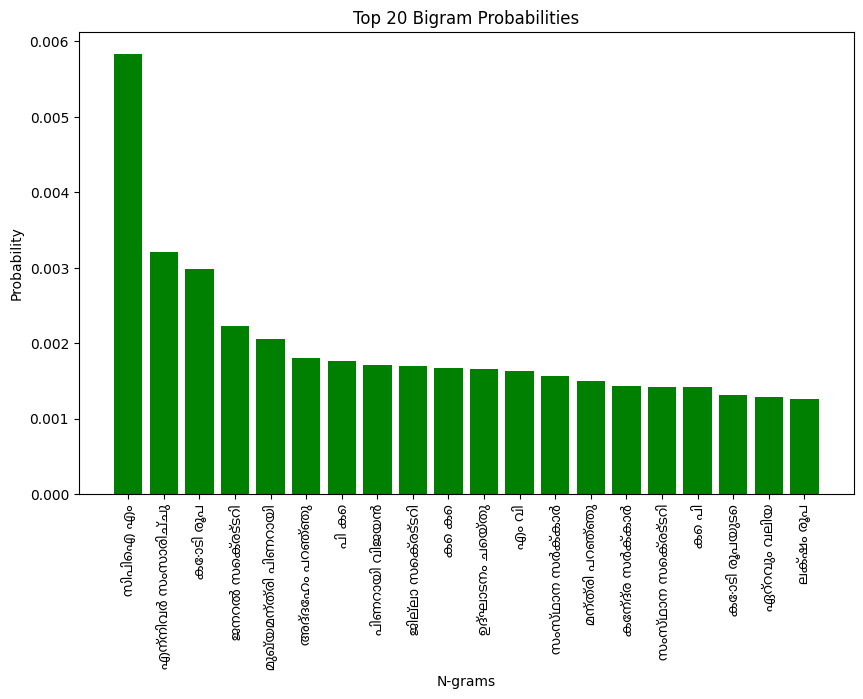

In [29]:
plot_ngram_distribution_ma(bigram_probs_ma, 'Bigram Probabilities')

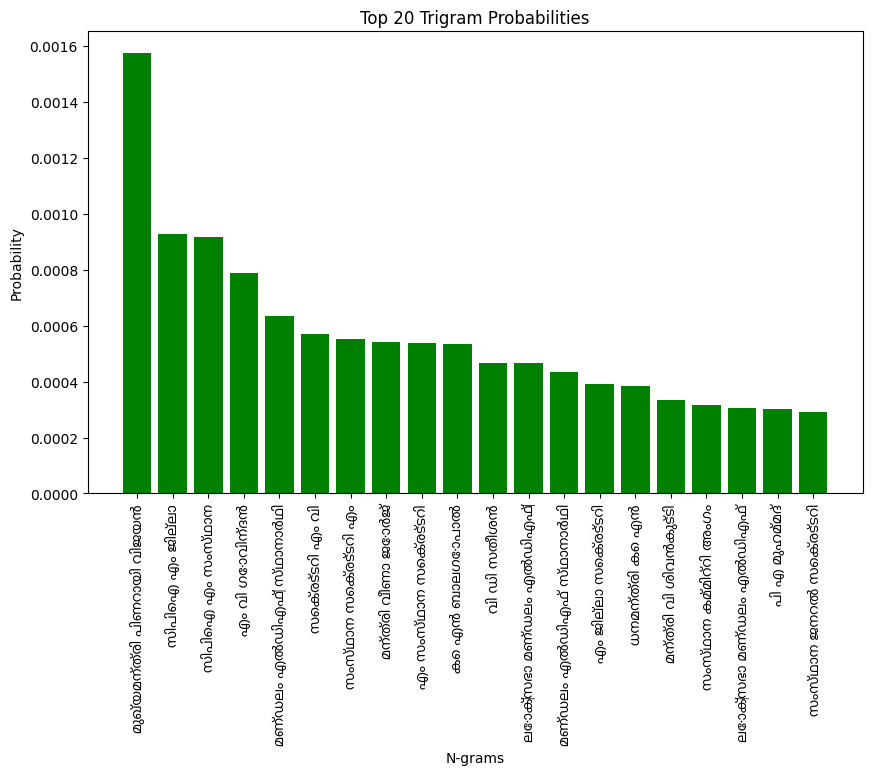

In [30]:
plot_ngram_distribution_ma(trigram_probs_ma, 'Trigram Probabilities')

# using nltk

In [31]:
import nltk
from nltk import FreqDist, ngrams


unigram_fd = FreqDist(tokens)
bigram_fd = FreqDist(ngrams(tokens, 2))
trigram_fd = FreqDist(ngrams(tokens, 3))

total_count = len(tokens)
unigram_probs_nltk = {word: freq / total_count for word, freq in unigram_fd.items()}
bigram_probs_nltk = {bigram: freq / unigram_fd[bigram[0]] for bigram, freq in bigram_fd.items()}
trigram_probs_nltk = {trigram: freq / bigram_fd[trigram[:2]] for trigram, freq in trigram_fd.items()}


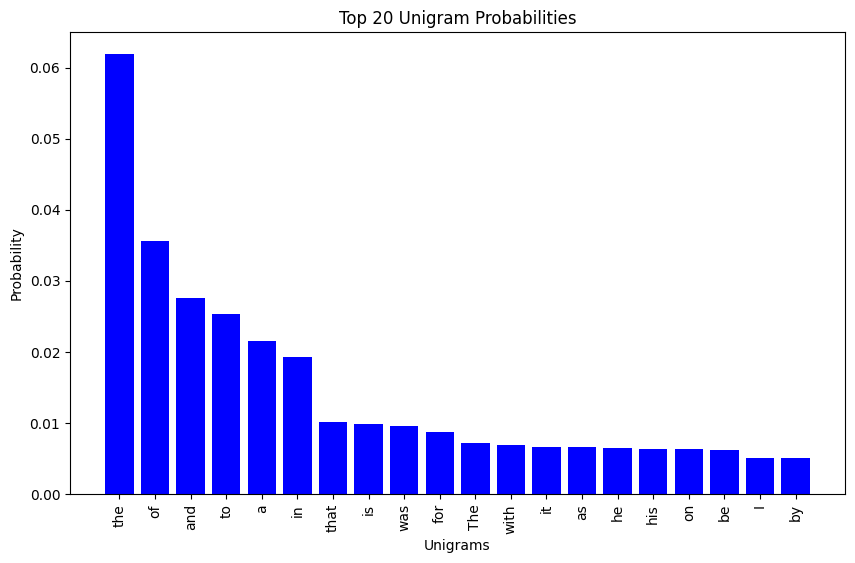

In [32]:
plot_unigram_distribution(unigram_probs_nltk)

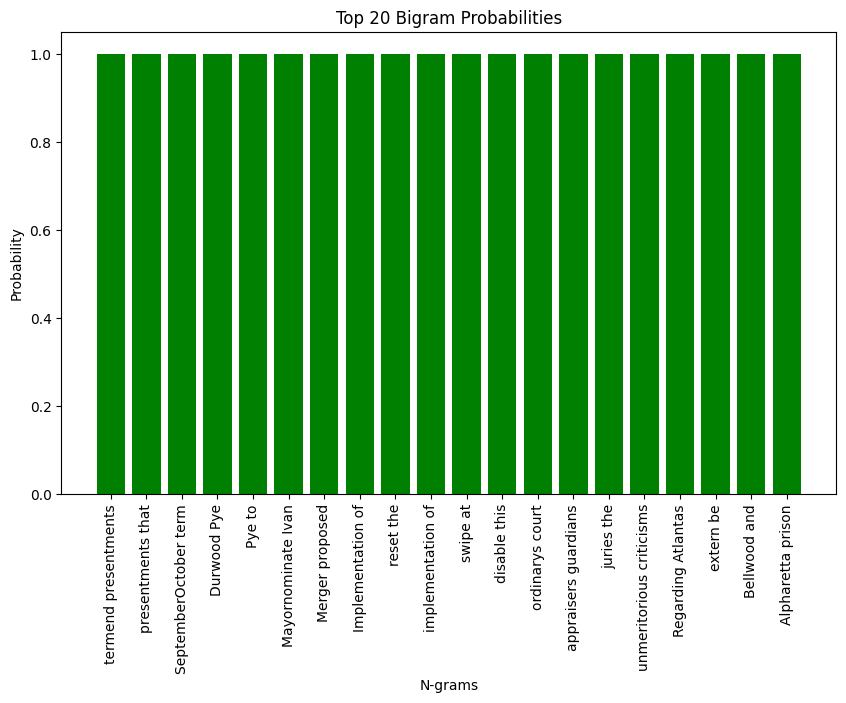

In [33]:
plot_ngram_distribution(bigram_probs_nltk, 'Bigram Probabilities')

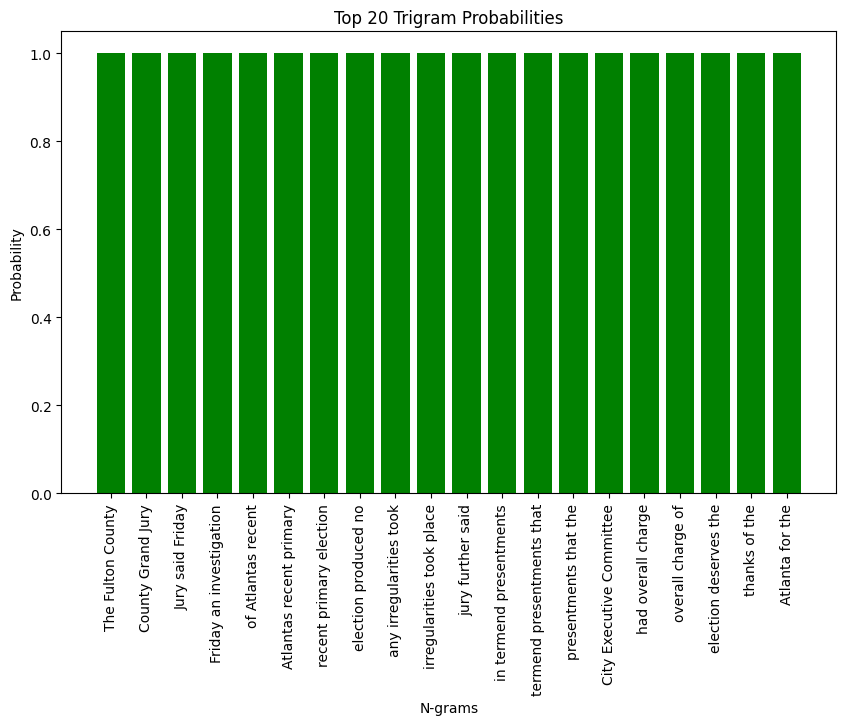

In [34]:
plot_ngram_distribution(trigram_probs_nltk, 'Trigram Probabilities')

The NLTK plots for bigram and trigram probabilities show a different distribution compared to our manual calculations.
This difference arises primarily due to the way NLTK handles smoothing and probability calculation.
NLTK likely employs more sophisticated smoothing techniques, like Good-Turing or Kneser-Ney, which adjust probabilities based on the frequency of observed and unseen n-grams.
Our manual approach used add-one smoothing, which is a simpler method that adds 1 to the count of each n-gram.
Additionally, NLTK might handle sentence boundaries and tokenization slightly differently, affecting the resulting n-gram counts and probabilities.
Overall, the NLTK plots likely provide a more accurate representation of the true n-gram probabilities in the Brown corpus, as they leverage more advanced smoothing techniques.

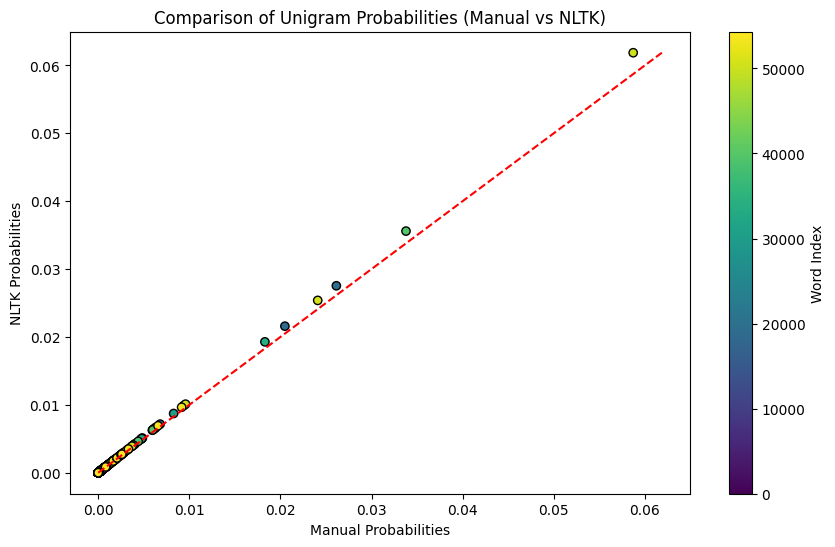

In [35]:
import matplotlib.pyplot as plt

def compare_probabilities(manual_probs, nltk_probs, title):
    common_words = set(manual_probs.keys()).intersection(set(nltk_probs.keys()))

    common_words = sorted(common_words)

    manual_values = [manual_probs[word] for word in common_words]
    nltk_values = [nltk_probs[word] for word in common_words]

    plt.figure(figsize=(10, 6))

    plt.scatter(manual_values, nltk_values, c=range(len(common_words)), cmap='viridis', edgecolor='black')

    plt.plot([0, max(manual_values + nltk_values)], [0, max(manual_values + nltk_values)], color='red', linestyle='--')
    plt.title(f'Comparison of {title} (Manual vs NLTK)')
    plt.xlabel('Manual Probabilities')
    plt.ylabel('NLTK Probabilities')

    plt.colorbar(label='Word Index')

    plt.show()

compare_probabilities(unigram_probs, unigram_probs_nltk, 'Unigram Probabilities')


The scatter plot shows a strong positive correlation between the unigram probabilities
calculated manually and those calculated using NLTK.
This indicates that both methods produce very similar results,
validating the accuracy of our manual implementation.

The points closely follow the red dashed line (y=x),
suggesting that the probabilities calculated by both methods are nearly identical for most words.
This reinforces the reliability of our manual calculation of unigram probabilities.